In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
import glob
dir_ = Path('C:/Users/dydql/medicine_classification/images')
filepaths = list(dir_.glob(r'**/*.jpg'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기 
    """

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

df = proc_img(filepaths)
df.head(5)

,Filepath,Label
0,C:\Users\dydql\medicine_classification\images\...,pill
1,C:\Users\dydql\medicine_classification\images\...,pill
2,C:\Users\dydql\medicine_classification\images\...,coin
3,C:\Users\dydql\medicine_classification\images\...,pill
4,C:\Users\dydql\medicine_classification\images\...,pill


In [3]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 1212

Number of different labels: 5

Labels: ['pill' 'coin' 'round' 'screw' 'feed']


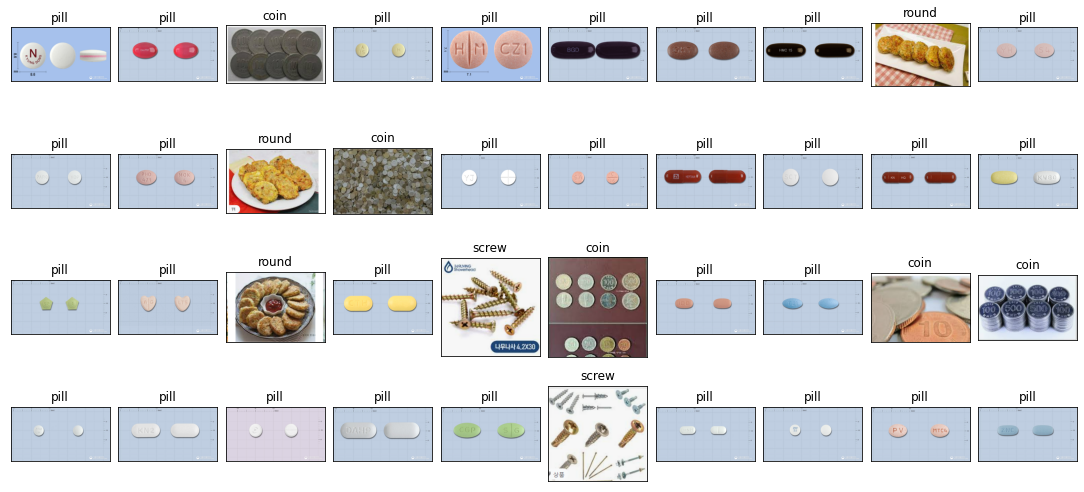

In [4]:
# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
# Training/test split
# train_df,test_df = train_test_split(df.sample(frac=0.2), test_size=0.1,random_state=0) #모델링 시간이 오래걸리면 사용
train_df,test_df = train_test_split(df, test_size=0.1,random_state=0)
train_df.shape,test_df.shape

((1090, 2), (122, 2))

In [6]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory('images',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('images',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 972 images belonging to 5 classes.
Found 240 images belonging to 5 classes.


In [7]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [32]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

Epoch 1/10
31/31 [==============================] - 35s 1s/step - loss: 1.1839 - accuracy: 0.8148 - val_loss: 0.2119 - val_accuracy: 0.9250
Epoch 2/10
31/31 [==============================] - 24s 765ms/step - loss: 0.2087 - accuracy: 0.9300 - val_loss: 0.2100 - val_accuracy: 0.9208
Epoch 3/10
31/31 [==============================] - 23s 741ms/step - loss: 0.1739 - accuracy: 0.9372 - val_loss: 0.1411 - val_accuracy: 0.9458
Epoch 4/10
31/31 [==============================] - 25s 798ms/step - loss: 0.1060 - accuracy: 0.9619 - val_loss: 0.1032 - val_accuracy: 0.9542
Epoch 5/10
31/31 [==============================] - 24s 764ms/step - loss: 0.0520 - accuracy: 0.9825 - val_loss: 0.0922 - val_accuracy: 0.9583
Epoch 6/10
31/31 [==============================] - 25s 805ms/step - loss: 0.0277 - accuracy: 0.9928 - val_loss: 0.1039 - val_accuracy: 0.9583
Epoch 7/10
31/31 [==============================] - 23s 749ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9625
Ep

In [8]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [9]:
def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    # 라벨 개수가 5개이기 때문에 Dencs도 5로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [10]:
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.ResNet152V2)
history = model.fit(train_images,validation_data=val_images,epochs=5)

Found 981 validated image filenames belonging to 5 classes.
Found 109 validated image filenames belonging to 5 classes.
Found 122 validated image filenames belonging to 5 classes.
Epoch 1/5
31/31 [==============================] - 343s 10s/step - loss: 0.1296 - accuracy: 0.9572 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 2/5
31/31 [==============================] - 321s 10s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 3/5
31/31 [==============================] - 302s 10s/step - loss: 5.6079e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/5
31/31 [==============================] - 301s 10s/step - loss: 2.5007e-04 - accuracy: 1.0000 - val_loss: 8.0454e-04 - val_accuracy: 1.0000
Epoch 5/5
31/31 [==============================] - 297s 10s/step - loss: 1.9290e-04 - accuracy: 1.0000 - val_loss: 7.4437e-04 - val_accuracy: 1.0000


In [12]:
from sklearn.metrics import accuracy_score
from IPython.display import display, Markdown, Latex
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
    
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
printmd(f'# Accuracy on the test set: {acc * 100:.2f}%')

# Accuracy on the test set: 99.18%

In [13]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

        coin       1.00      0.89      0.94         9
        feed       0.67      1.00      0.80         2
        pill       1.00      1.00      1.00       101
       round       1.00      1.00      1.00         2
       screw       1.00      1.00      1.00         8

    accuracy                           0.99       122
   macro avg       0.93      0.98      0.95       122
weighted avg       0.99      0.99      0.99       122



번호를 입력하세요 : 12


## 예측률 : 100.00%

### Class prediction = pill

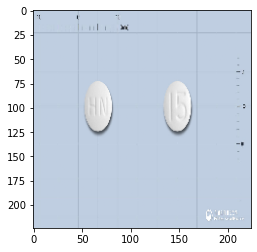

In [14]:
# from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
class_dictionary = {'coin': 0,
                    'feed': 1,
                    'pill': 2,
                    'round': 3,
                    'screw': 4}
IMAGE_SIZE    = (224, 224)
number_1 = int(input("번호를 입력하세요 : ")) # 10, 50, 100
test_image = image.load_img(test_df.iloc[number_1, 0]
                            ,target_size =IMAGE_SIZE )
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255.);

test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)
prediction = model.predict(test_image)

df = pd.DataFrame({'pred':prediction[0]})
df = df.sort_values(by='pred', ascending=False, na_position='first')
printmd(f"## 예측률 : {(df.iloc[0]['pred'])* 100:.2f}%")

for x in class_dictionary:
  if class_dictionary[x] == (df[df == df.iloc[0]].index[0]):
    printmd(f"### Class prediction = {x}")
    break